In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import datasets

from dbc.main import KmeansDiscreteBayesianClassifier, KmeansDiscreteMinmaxClassifier, \
    CmeansDiscreteBayesianClassifier, DecisionTreeDiscreteBayesianClassifier, DecisionTreeDiscreteMinimaxClassifier, DiscriminativeDiscreteBayesianClassifier, DiscriminativeMinmaxClassifier
from dbc.utils import compute_class_conditional_risk_with_labels

from sklearn.metrics import accuracy_score

In [2]:
# Generate data
X_train, y_train = datasets.make_blobs(
    n_samples=[125 * 5, 125 * 2, 10],
    n_features=2,
    centers=[(9.5, 10), (10, 9.4),(9,11)],
    cluster_std=[[0.6, 0.6], [0.35, 0.3], [0.2,0.2]],
    shuffle=True
)

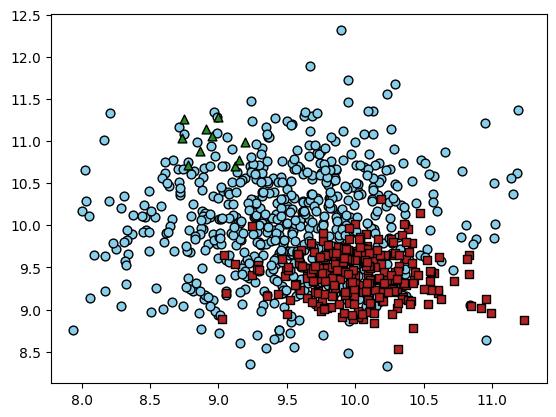

In [3]:
colors = ['skyblue', 'firebrick', 'forestgreen']
markers = ['o', 's', '^']  # 圆形、方形、三角形

for i, (c, m) in enumerate(zip(colors, markers)):
    plt.scatter(
        X_train[y_train == i, 0],
        X_train[y_train == i, 1],
        color=c,
        edgecolor='k',
        marker=m,
        s=40,
        label=f'Class {i}'
    )


In [4]:
T = 5

In [5]:
DBC_kmeans = KmeansDiscreteBayesianClassifier(n_clusters=2,classes_wise=True)
DBC_kmeans.fit(X_train, y_train)
y_pred = DBC_kmeans.predict(X_train)
conditional_risk = compute_class_conditional_risk_with_labels(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.2416 0.088  1.    ]

Confusion matrix: 
[[0.7584 0.2416 0.    ]
 [0.088  0.912  0.    ]
 [1.     0.     0.    ]]


In [6]:
from dbc.main import CmeansDiscreteMinmaxClassifier
DBC_fcm = CmeansDiscreteBayesianClassifier(n_clusters=T, cluster_centers=DBC_kmeans.cluster_centers,fuzzifier=1.5)
DBC_fcm.fit(X_train, y_train)
y_pred = DBC_fcm.predict(X_train)
conditional_risk = compute_class_conditional_risk_with_labels(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.1184 0.272  1.    ]

Confusion matrix: 
[[0.8816 0.1184 0.    ]
 [0.272  0.728  0.    ]
 [1.     0.     0.    ]]


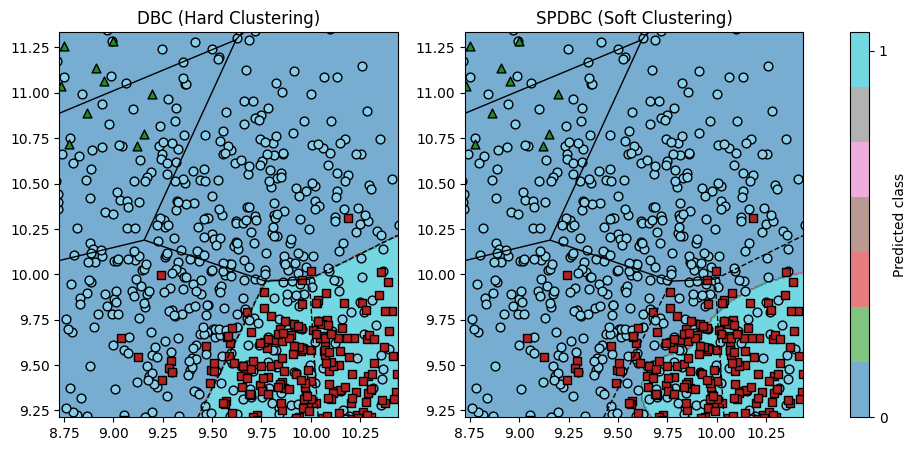

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
vor = Voronoi(DBC_kmeans.cluster_centers)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[0])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[1])

Z_hard = DBC_kmeans.predict_prob(np.c_[xx.ravel(), yy.ravel()])
Z_soft = DBC_fcm.predict_prob(np.c_[xx.ravel(), yy.ravel()])

Z_hard_labels = np.argmax(Z_hard, axis=1).reshape(xx.shape)
Z_soft_labels = np.argmax(Z_soft, axis=1).reshape(xx.shape)


contour1 = ax[0].contourf(xx, yy, Z_hard_labels, cmap='tab10', alpha=0.6)
contour2 = ax[1].contourf(xx, yy, Z_soft_labels, cmap='tab10', alpha=0.6)

for i, (c, m) in enumerate(zip(colors, markers)):
    ax[0].scatter(
        X_train[y_train == i, 0],
        X_train[y_train == i, 1],
        color=c,
        edgecolor='k',
        marker=m,
        s=40,
        label=f'Class {i}'
    )
    ax[1].scatter(
        X_train[y_train == i, 0],
        X_train[y_train == i, 1],
        color=c,
        edgecolor='k',
        marker=m,
        s=40,
        label=f'Class {i}'
    )

ax[0].set_title('DBC (Hard Clustering)')
ax[1].set_title('SPDBC (Soft Clustering)')
plt.colorbar(contour2, ax=ax, ticks=[0, 1, 2], label='Predicted class')
plt.show()


In [13]:
DMC_kmeans = KmeansDiscreteMinmaxClassifier(n_clusters=3,classes_wise=True)

DMC_kmeans.fit(X_train, y_train)
y_pred = DMC_kmeans.predict(X_train)
conditional_risk = compute_class_conditional_risk_with_labels(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

DMC_fcm = CmeansDiscreteMinmaxClassifier(n_clusters=T, cluster_centers=DMC_kmeans.cluster_centers,fuzzifier=1.5)
DMC_fcm.fit(X_train, y_train)
y_pred = DMC_fcm.predict(X_train)
conditional_risk = compute_class_conditional_risk_with_labels(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.3136 0.168  0.3   ]

Confusion matrix: 
[[0.6864 0.264  0.0496]
 [0.168  0.832  0.    ]
 [0.3    0.     0.7   ]]
Class condition risk: 
[0.2112 0.212  0.2   ]

Confusion matrix: 
[[0.7888 0.1648 0.0464]
 [0.212  0.788  0.    ]
 [0.2    0.     0.8   ]]


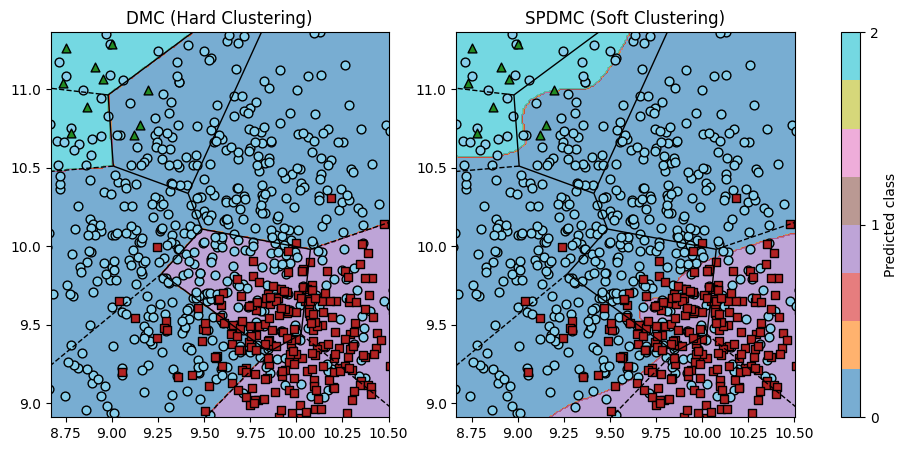

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

vor = Voronoi(DMC_kmeans.cluster_centers)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[0])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[1])

Z_hard = DMC_kmeans.predict_prob(np.c_[xx.ravel(), yy.ravel()])
Z_soft = DMC_fcm.predict_prob(np.c_[xx.ravel(), yy.ravel()])

Z_hard_labels = np.argmax(Z_hard, axis=1).reshape(xx.shape)
Z_soft_labels = np.argmax(Z_soft, axis=1).reshape(xx.shape)


contour1 = ax[0].contourf(xx, yy, Z_hard_labels, cmap='tab10', alpha=0.6)
contour2 = ax[1].contourf(xx, yy, Z_soft_labels, cmap='tab10', alpha=0.6)

colors = ['skyblue', 'firebrick', 'forestgreen']
markers = ['o', 's', '^']  # 圆形、方形、三角形

for i, (c, m) in enumerate(zip(colors, markers)):
    ax[0].scatter(
        X_train[y_train == i, 0],
        X_train[y_train == i, 1],
        color=c,
        edgecolor='k',
        marker=m,
        s=40,
        label=f'Class {i}'
    )
    ax[1].scatter(
        X_train[y_train == i, 0],
        X_train[y_train == i, 1],
        color=c,
        edgecolor='k',
        marker=m,
        s=40,
        label=f'Class {i}'
    )


ax[0].set_title('DMC (Hard Clustering)')
ax[1].set_title('SPDMC (Soft Clustering)')
plt.colorbar(contour2, ax=ax, ticks=[0, 1, 2], label='Predicted class')
plt.show()


In [10]:
Z_soft

array([[0.6589504 , 0.26907227, 0.07197733],
       [0.65884647, 0.26932534, 0.07182819],
       [0.65874011, 0.26958105, 0.07167884],
       ...,
       [0.62841672, 0.23178499, 0.13979829],
       [0.62830543, 0.23210502, 0.13958955],
       [0.62819371, 0.2324242 , 0.13938209]], shape=(318000, 3))